In [7]:
import sys
sys.path.insert(0, '..')

from pyphoon.clean.fix import TyphoonListImageFixAlgorithm
from os.path import exists, join
from pyphoon.io.typhoonlist import create_typhoonlist_from_source
from pyphoon.io.h5 import read_source_image
from pyphoon.clean.detection import detect_corrupted_pixels_1
from pyphoon.clean.correction import correct_corrupted_pixels_1
from pyphoon.clean.fix import generate_image_frames_ids
from pyphoon.clean.fillgaps import generate_new_frames_1
import matplotlib.pyplot as plt
%matplotlib inline

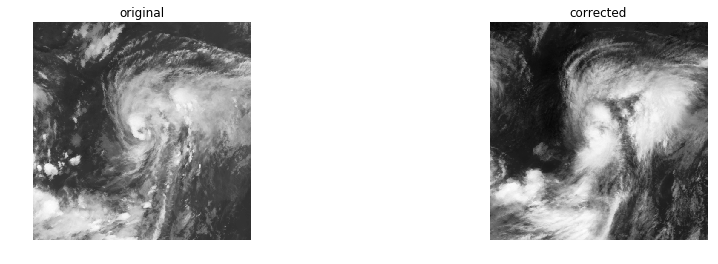

In [8]:
folder = '200004'
seq = create_typhoonlist_from_source(
    name=folder,
    images=join('../../../../datasets/typhoon/wnp/image/', folder)
)
# Fix TyphoonList
detect_fct = detect_corrupted_pixels_1  # Detection method
correct_fct = correct_corrupted_pixels_1  # Correction method
detect_params = {'min_th': 160, 'max_th': 310}  # Parameters for detection meth
# Generation
fillgaps_fct = generate_new_frames_1  # Fill gap method
n_frames_th = 2  # Maximum number of frames to generate
fix_algorithm = TyphoonListImageFixAlgorithm(
    detect_fct=detect_fct,
    correct_fct=correct_fct,
    fillgaps_fct=fillgaps_fct,
    detect_params=detect_params,
    n_frames_th=n_frames_th
)
seq_new = fix_algorithm.apply(seq)
corrected = fix_algorithm.fixed_ids['corrected']
seq = []
image_corr = seq_new.get_data(key='images', id='200004_2000070911')
image_orig = read_source_image(
    path_to_file='../../../../datasets/typhoon/wnp/image/200004/2000070911-200004-GMS5-1.h5')
plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.title('original')
plt.axis('off')
plt.imshow(image_orig, cmap="Greys")
plt.subplot(122)
plt.title('corrected')
plt.axis('off')
plt.imshow(image_corr, cmap="Greys")